# IPL Data Analysis & Visualization


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
match_data = pd.read_csv('../data/raw/IPL Matches 2008-2020.csv')
ball_data = pd.read_csv('../data/raw/IPL Ball-by-Ball 2008-2020.csv')

# Data Preparation and cleaning
We will be using various libraries such as Numpy, Seaborn, Pandas & Matplotlib 

In [3]:
match_data.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
ball_data.head()

,id,inning,batting_team,bowling_team,over,ball,batsman,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [5]:
#Check if there is any null values in match data set
#We can use .isnull() to set Null values to True and then use .sum() to calculate all the null values

match_data.isnull().sum()

id                   0
season               0
city                51
date                 0
match_type           0
player_of_match      4
venue                0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               0
result_margin       17
target_runs          2
target_overs         2
super_over           0
method             797
umpire1              0
umpire2              0
dtype: int64

In [6]:
 ball_data.isnull().sum()

id                       0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         183369
is_wicket                0
player_dismissed    184095
dismissal_kind      184095
fielder             186834
dtype: int64

In [7]:
#The Describe method give us the overview of our data in rows & in columns

match_data.describe

<bound method NDFrame.describe of           id   season        city        date   match_type player_of_match  \
0     335982  2007/08   Bangalore  2008-04-18       League     BB McCullum   
1     335983  2007/08  Chandigarh  2008-04-19       League      MEK Hussey   
2     335984  2007/08       Delhi  2008-04-19       League     MF Maharoof   
3     335985  2007/08      Mumbai  2008-04-20       League      MV Boucher   
4     335986  2007/08     Kolkata  2008-04-20       League       DJ Hussey   
..       ...      ...         ...         ...          ...             ...   
811  1216495  2020/21         NaN  2020-11-03       League        S Nadeem   
812  1237177  2020/21         NaN  2020-11-05  Qualifier 1       JJ Bumrah   
813  1237178  2020/21   Abu Dhabi  2020-11-06   Eliminator   KS Williamson   
814  1237180  2020/21   Abu Dhabi  2020-11-08  Qualifier 2      MP Stoinis   
815  1237181  2020/21         NaN  2020-11-10        Final        TA Boult   

                             

In [8]:
match_data.shape

(816, 20)

In [9]:
match_data.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='str')

In [10]:
#We seeing the number of matches that has been played and which cities. And more inportantly, 
#teams that participated

print('Match played so far:', match_data.shape[0])

print("\n cities played at:", match_data['city'].unique())

print('\n Teams participated: ' , match_data['team1'].unique())

Match played so far: 816

 cities played at: <StringArray>
[     'Bangalore',     'Chandigarh',          'Delhi',         'Mumbai',
        'Kolkata',         'Jaipur',      'Hyderabad',        'Chennai',
      'Cape Town', 'Port Elizabeth',         'Durban',      'Centurion',
    'East London',   'Johannesburg',      'Kimberley',   'Bloemfontein',
      'Ahmedabad',        'Cuttack',         'Nagpur',     'Dharamsala',
          'Kochi',         'Indore',  'Visakhapatnam',           'Pune',
         'Raipur',         'Ranchi',      'Abu Dhabi',              nan,
         'Rajkot',         'Kanpur',      'Bengaluru']
Length: 31, dtype: str

 Teams participated:  <StringArray>
['Royal Challengers Bangalore',             'Kings XI Punjab',
            'Delhi Daredevils',              'Mumbai Indians',
       'Kolkata Knight Riders',            'Rajasthan Royals',
             'Deccan Chargers',         'Chennai Super Kings',
        'Kochi Tuskers Kerala',               'Pune Warriors',


In [11]:
#Season and number of matches 

match_data['Season'] = pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Season
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,2008


In [12]:
match_per_season = match_data.groupby(['Season'])['id'].count().reset_index().rename(columns = {'id': 'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'Total matchs played in each season')

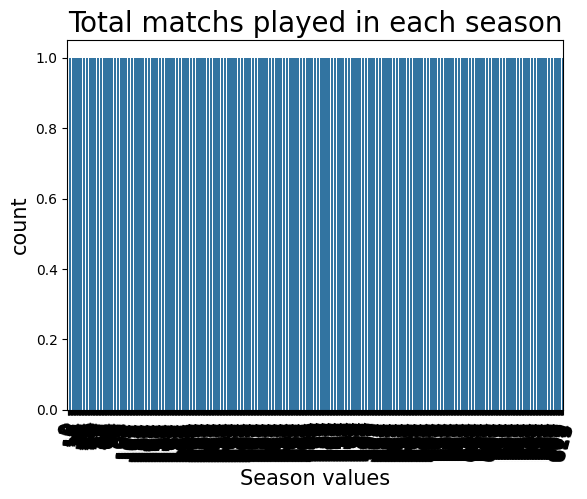

In [13]:
sns.countplot(match_data['Season'])
plt.xticks(rotation=75, fontsize=15)
plt.yticks(fontsize= 10)
plt.xlabel('Season values', fontsize= 15)
plt.ylabel('count', fontsize= 15)
plt.title("Total matchs played in each season", fontsize=20, fontweight ="normal")

In [14]:
season_data=match_data[['id', 'Season']].merge(ball_data, left_on = 'id', right_on = 'id', how = 'left').drop('id', axis = 1)
season_data.head()       


,Season,inning,batting_team,bowling_team,over,ball,batsman,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


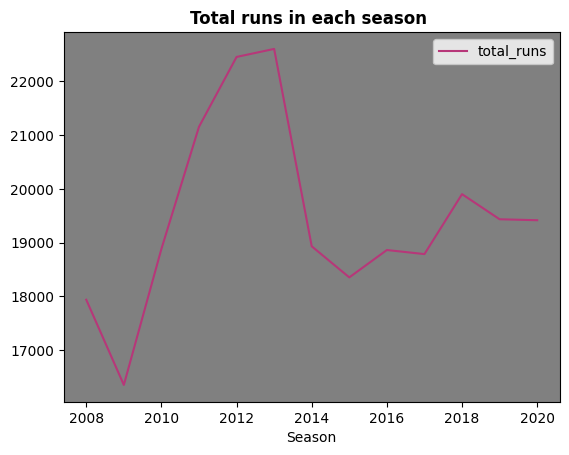

In [15]:
season = season_data.groupby(['Season'])['total_runs'].sum().reset_index()
p = season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = 'grey')
sns.lineplot(data= p, palette = 'magma' )
plt.title('Total runs in each season ',fontsize = 12, fontweight="bold")
plt.show()

In [16]:
runs_per_season=pd.concat([match_per_season, season.iloc[:,1]],axis=1)
runs_per_season['Runs scored per match']=runs_per_season['total_runs']/runs_per_season['matches']
runs_per_season.set_index('Season', inplace = True)
runs_per_season

,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16353,286.894737
2010,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


/var/folders/kc/cf3rtgfs4wg6l7x9_72r25940000gn/T/ipykernel_8495/1740389866.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=toss.index, x =toss, orient="h", palette="icefire", saturation =1)


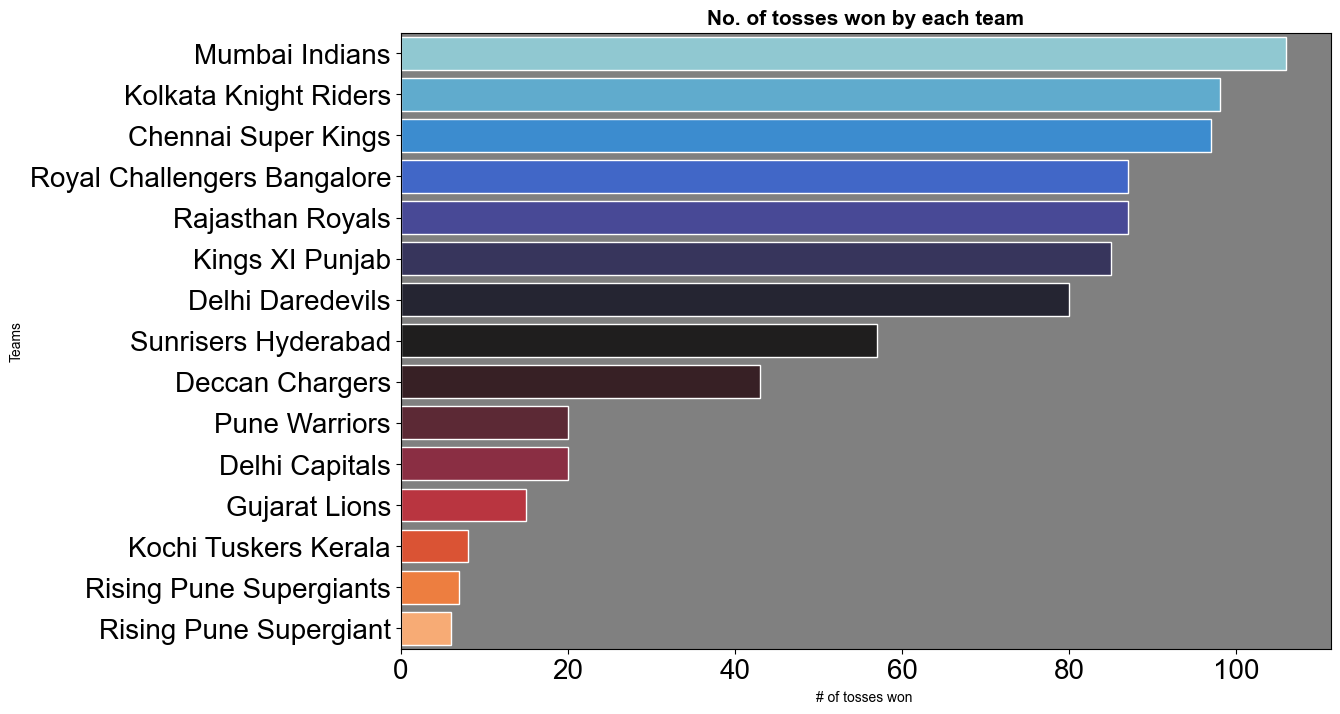

In [17]:
plt.figure(figsize=(12,8))
toss = match_data['toss_winner'].value_counts()
ax = plt.axes()
ax.set(facecolor = "grey")
sns.set(rc={'figure.figsize':(6,4)}, style = 'darkgrid')
ax.set_title('No. of tosses won by each team', fontsize =15, fontweight="bold")
plt.tick_params(labelsize=20)
sns.barplot(y=toss.index, x =toss, orient="h", palette="icefire", saturation =1)
plt.xlabel('# of tosses won ')
plt.ylabel('Teams')
plt.show()

Text(0, 0.5, 'Count')

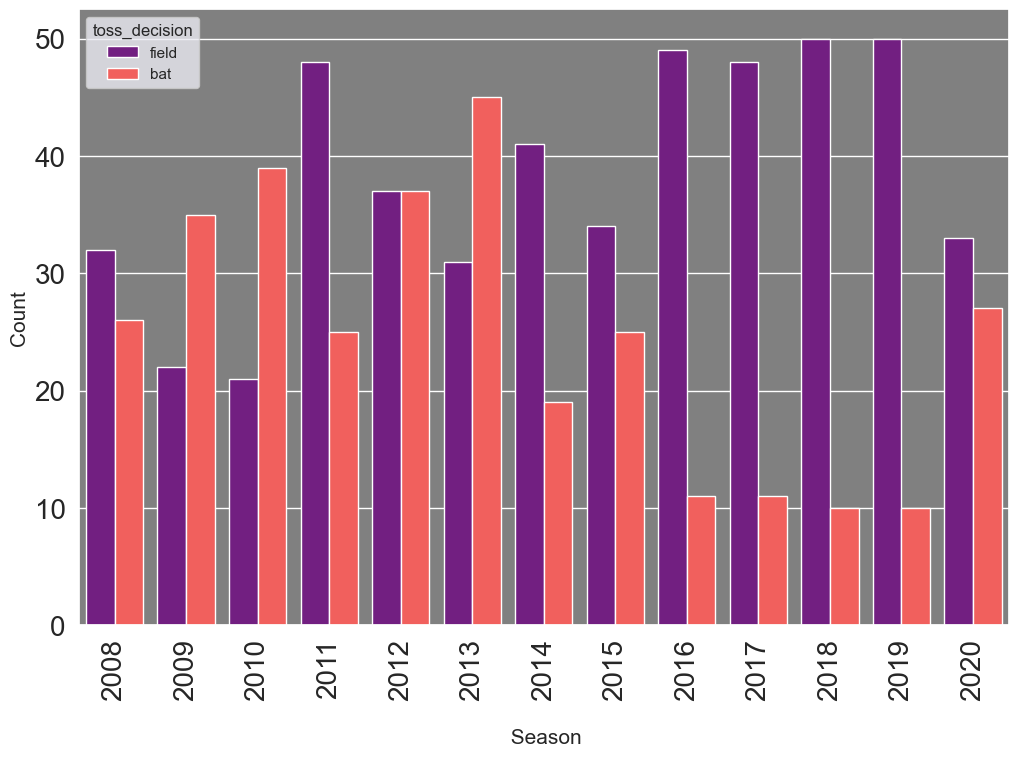

In [18]:
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set(facecolor = "grey")
sns.countplot(x= 'Season', hue = 'toss_decision', data= match_data, palette = 'magma', saturation= 1)
plt.xticks(rotation=90, fontsize =10)
plt.yticks(fontsize=15)
plt.tick_params(labelsize=20)
plt.xlabel("\n Season", fontsize =15)
plt.ylabel('Count', fontsize= 15)


In [19]:
match_data['result'].value_counts()

result
wickets      435
runs         364
tie           13
no result      4
Name: count, dtype: int64

In [20]:
match_data.venue[match_data.result!='runs'].mode()

0    Eden Gardens
Name: venue, dtype: str

In [21]:
match_data.venue[match_data.result!='wickets'].mode()

0    Wankhede Stadium
Name: venue, dtype: str

In [22]:
match_data.venue[match_data.toss_winner== "Mumbai Indians"][match_data.winner== "Mumbai Indians"].mode()

match_data.winner[match_data.result!='runs'].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
Name: winner, dtype: str

In [23]:
match_data.winner[match_data.result!='wickets'].mode()

0    Mumbai Indians
Name: winner, dtype: str

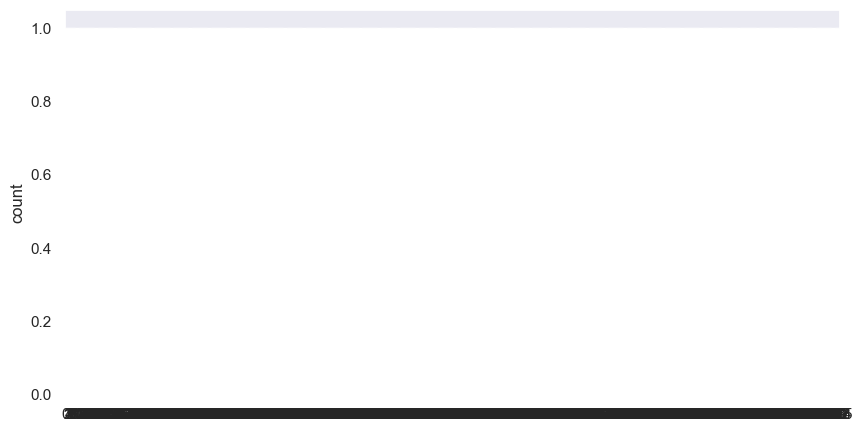

In [24]:
toss = match_data['toss_winner'] == match_data['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()


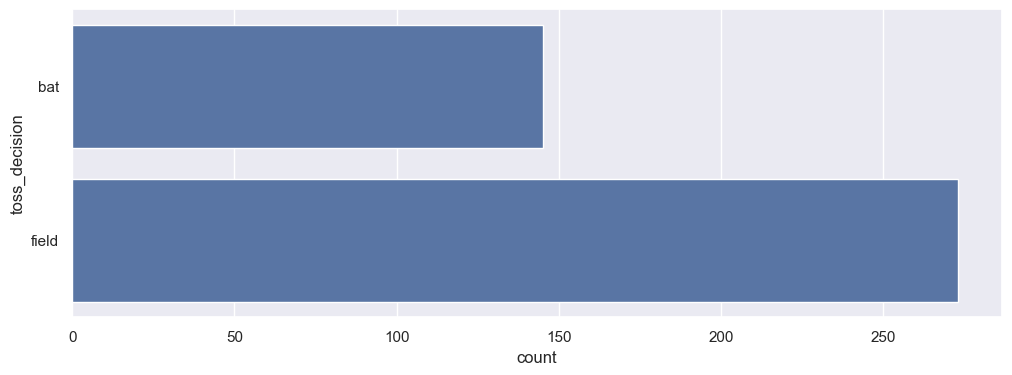

In [25]:
plt.figure(figsize=(12,4))
sns.countplot(match_data.toss_decision[match_data.toss_winner == match_data.winner])
plt.show()

In [26]:
player = (ball_data['batsman'] == 'AB de Villiers')
df_raina = ball_data[player]
df_raina.head()

,id,inning,batting_team,bowling_team,over,ball,batsman,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
4707,336001,2,Delhi Daredevils,Chennai Super Kings,11,3,AB de Villiers,Joginder Sharma,G Gambhir,0,0,0,NaN,0,NaN,NaN,NaN
4708,336001,2,Delhi Daredevils,Chennai Super Kings,11,4,AB de Villiers,Joginder Sharma,G Gambhir,1,0,1,NaN,0,NaN,NaN,NaN
4710,336001,2,Delhi Daredevils,Chennai Super Kings,11,6,AB de Villiers,Joginder Sharma,G Gambhir,1,0,1,NaN,0,NaN,NaN,NaN
4711,336001,2,Delhi Daredevils,Chennai Super Kings,12,1,AB de Villiers,M Muralitharan,G Gambhir,1,0,1,NaN,0,NaN,NaN,NaN
4713,336001,2,Delhi Daredevils,Chennai Super Kings,12,3,AB de Villiers,M Muralitharan,G Gambhir,2,0,2,NaN,0,NaN,NaN,NaN


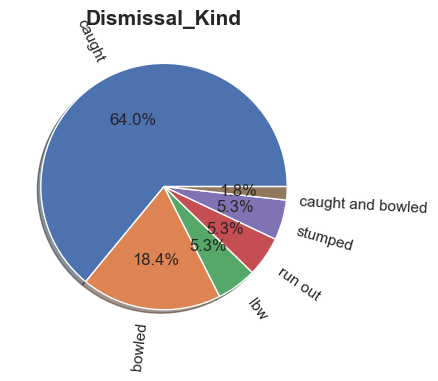

<Figure size 1200x800 with 0 Axes>

In [27]:
df_raina['dismissal_kind'].value_counts().plot.pie(autopct= '%1.1f%%', shadow=True, rotatelabels=True)
plt.title("Dismissal_Kind",fontweight='bold',fontsize ='15')
plt.figure(figsize=(12,8))
plt.show()

In [28]:
def count(df_raina, runs):
    return len(df_raina[df_raina["batsman_runs"]==runs])*runs

In [29]:
print('Runs scored from 1s:', count(df_raina,1))
print('Runs scored from 2s:', count(df_raina,2))
print('Runs scored from 3s:', count(df_raina,3))
print('Runs scored from 4s:', count(df_raina,4))
print('Runs scored from 5s:', count(df_raina,5))
print('Runs scored from 6s:', count(df_raina,6))




Runs scored from 1s: 1336
Runs scored from 2s: 498
Runs scored from 3s: 48
Runs scored from 4s: 1564
Runs scored from 5s: 0
Runs scored from 6s: 1422


In [30]:
match_data[match_data['result_margin']== match_data['result_margin'].max()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,Season
620,1082635,2017,Delhi,2017-05-06,League,LMP Simmons,Feroz Shah Kotla,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,...,Mumbai Indians,runs,146.0,213.0,20.0,N,NaN,Nitin Menon,CK Nandan,2017


In [31]:
runs =ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman', 'runs']
y = runs.sort_values(by= 'runs', ascending =False).head(10).reset_index().drop('index', axis= 1)
y

,Batsman,runs
0,V Kohli,5888
1,SK Raina,5376
2,DA Warner,5254
3,RG Sharma,5232
4,S Dhawan,5197
5,AB de Villiers,4868
6,CH Gayle,4804
7,MS Dhoni,4632
8,RV Uthappa,4609
9,G Gambhir,4217


/var/folders/kc/cf3rtgfs4wg6l7x9_72r25940000gn/T/ipykernel_8495/3249693599.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y['Batsman'],y=y['runs'], palette='rocket', saturation =1)


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

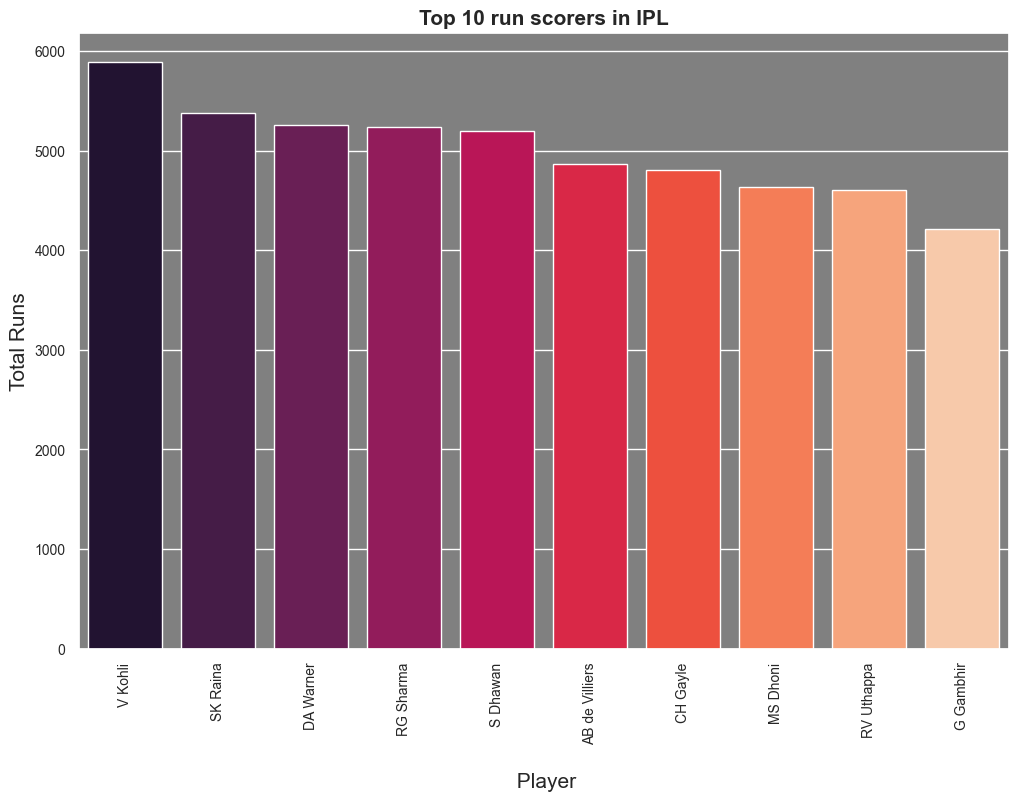

In [32]:
plt.figure(figsize=(12,8))

ax = plt.axes()
ax.set(facecolor = 'grey')
sns.barplot(x=y['Batsman'],y=y['runs'], palette='rocket', saturation =1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player', fontsize =15)
plt.ylabel('Total Runs', fontsize = 15)
plt.title('Top 10 run scorers in IPL', fontsize = 15 , fontweight = 'bold')


Text(0.5, 1.0, 'Highest MOM awards winners')

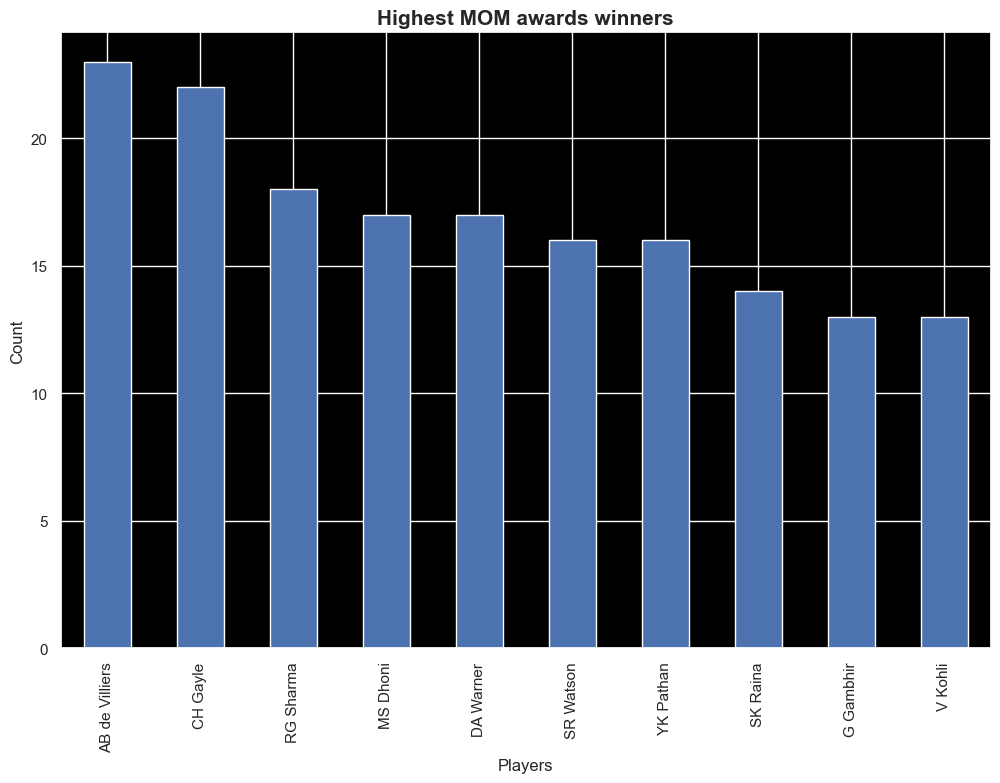

In [33]:
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set(facecolor = "black")
match_data.player_of_match.value_counts()[:10].plot(kind = 'bar')
plt.xlabel('Players')
plt.ylabel('Count')
plt.title("Highest MOM awards winners", fontsize =15, fontweight = 'bold')

In [34]:
match_data.venue.unique()

<StringArray>
[                               'M Chinnaswamy Stadium',
           'Punjab Cricket Association Stadium, Mohali',
                                     'Feroz Shah Kotla',
                                     'Wankhede Stadium',
                                         'Eden Gardens',
                               'Sawai Mansingh Stadium',
            'Rajiv Gandhi International Stadium, Uppal',
                      'MA Chidambaram Stadium, Chepauk',
                           'Dr DY Patil Sports Academy',
                                             'Newlands',
                                     'St George's Park',
                                            'Kingsmead',
                                      'SuperSport Park',
                                         'Buffalo Park',
                                'New Wanderers Stadium',
                                'De Beers Diamond Oval',
                                      'OUTsurance Oval',
                 

In [35]:
total_venue = list(match_data.venue.unique())
len(total_venue)

41

In [36]:
venue_df = match_data.groupby('venue')[['id']].count()
venue_df = venue_df.sort_values('id', ascending =False).reset_index()

venue_df.rename(columns= {'id': 'Total', 'venue': 'Stadium' },inplace=True)

In [37]:
labels = list(venue_df.Stadium)
venue_df

,Stadium,Total
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Dubai International Cricket Stadium,33
9,Sheikh Zayed Stadium,29


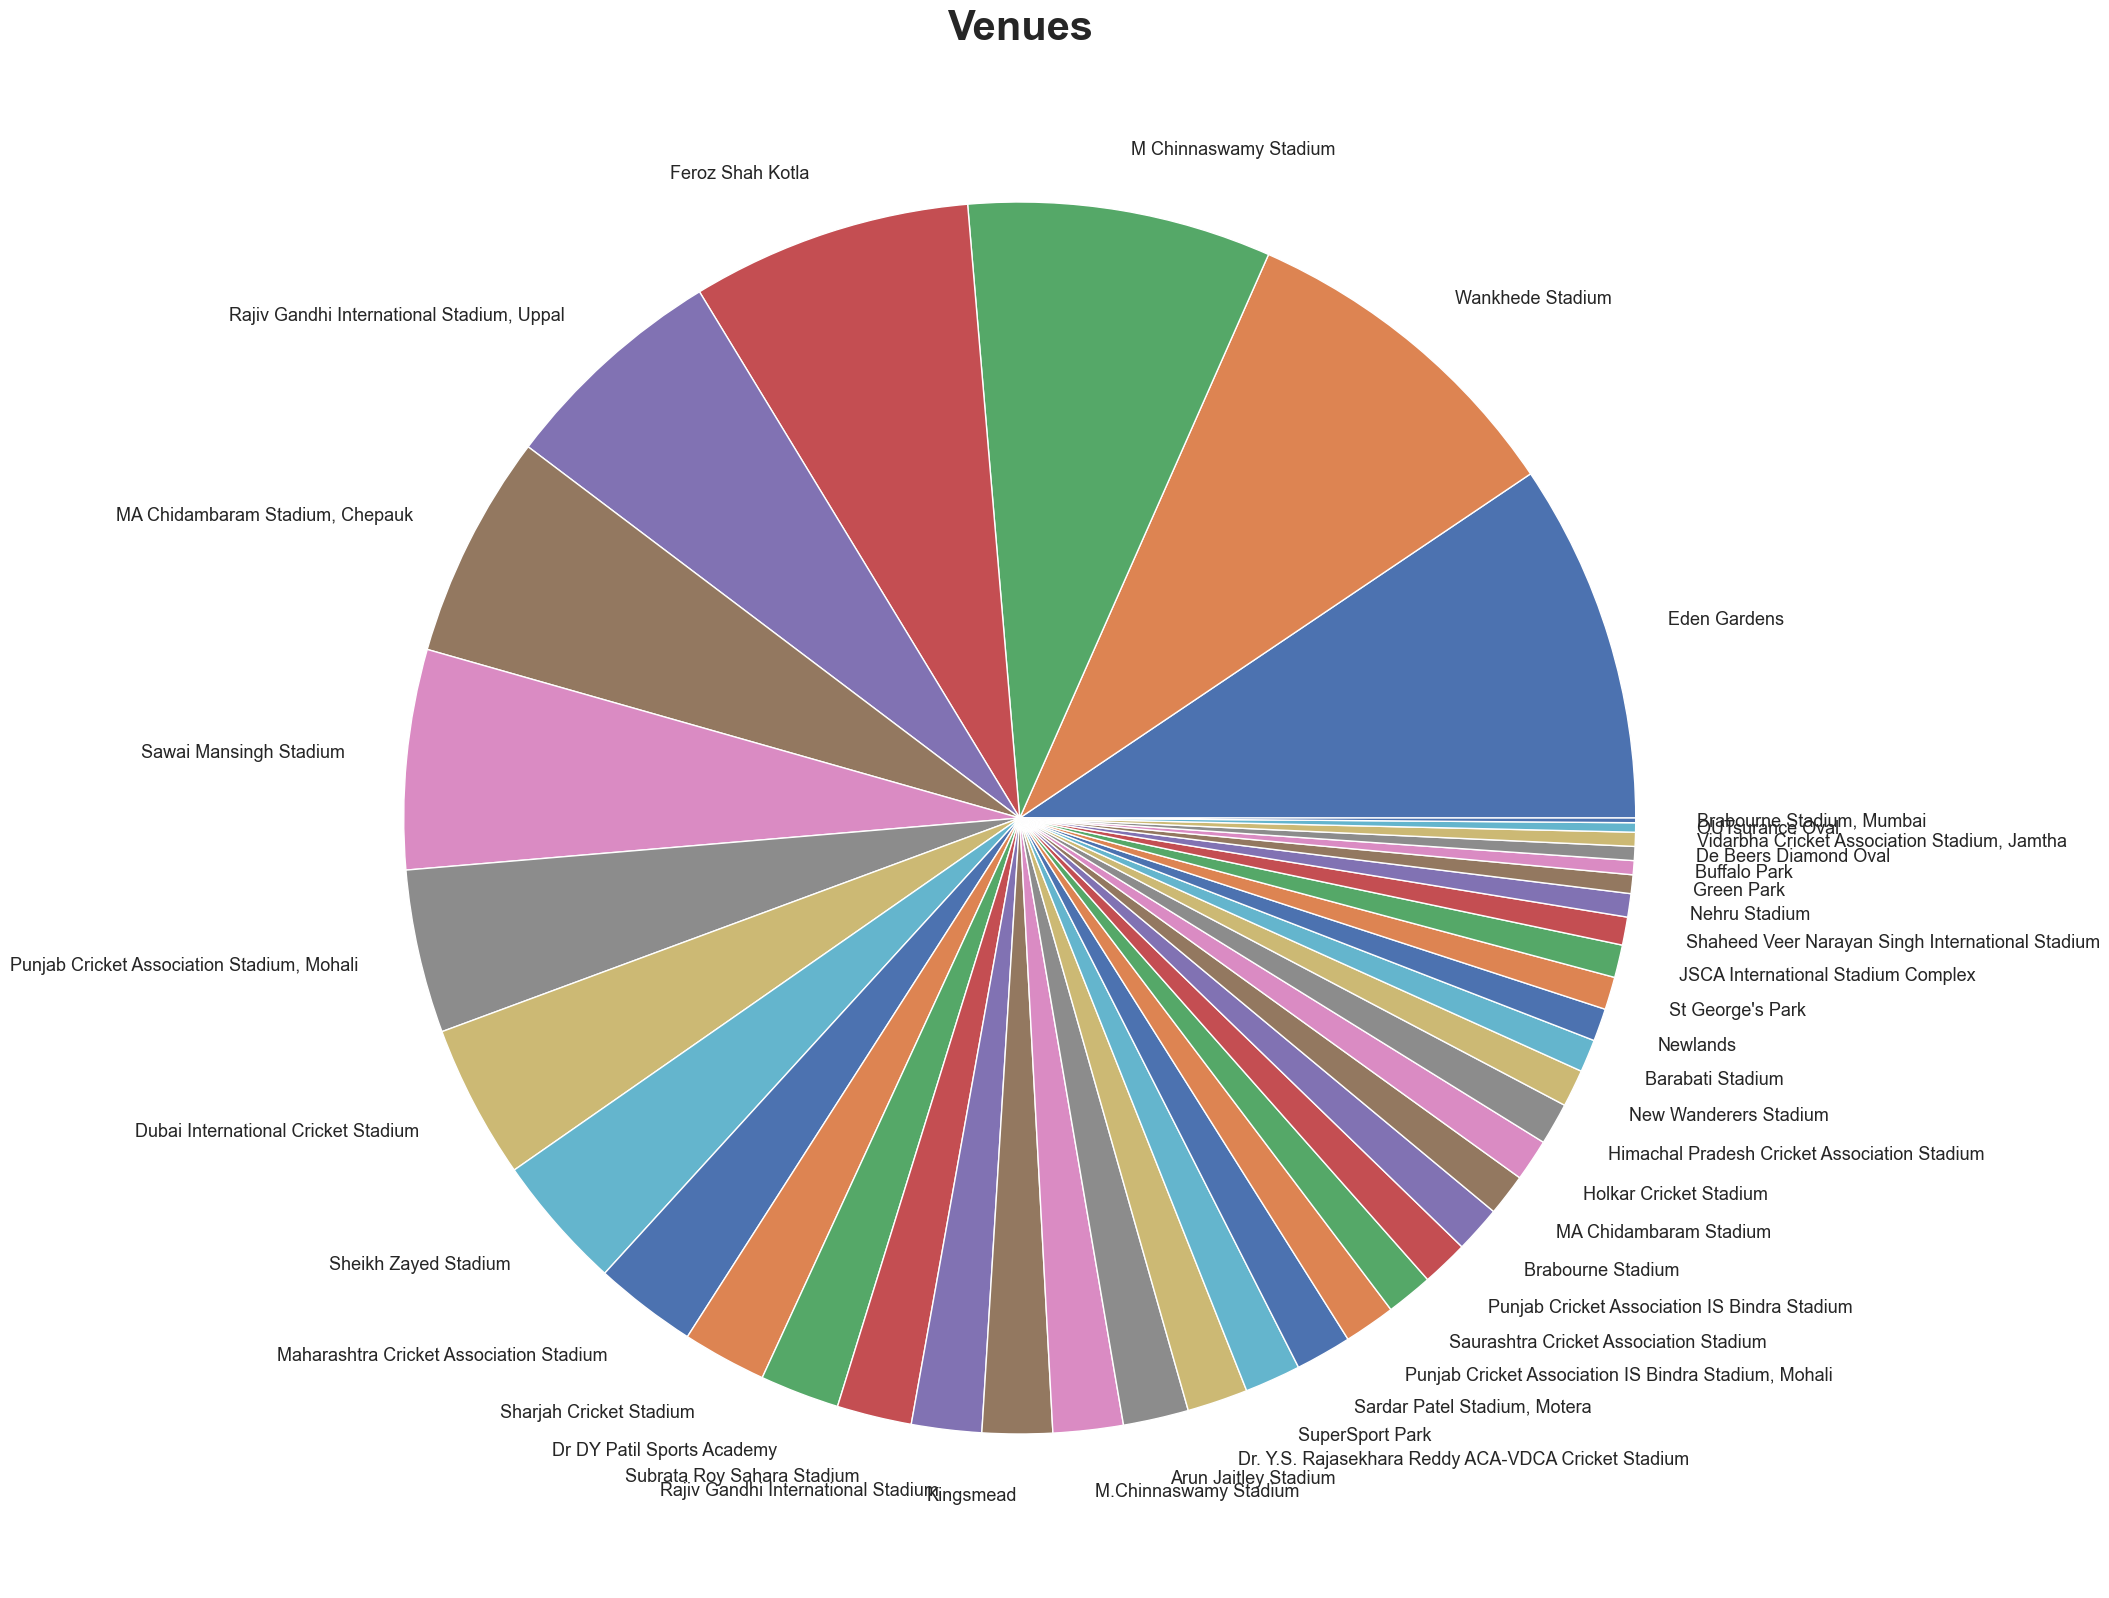

In [38]:
plt.figure(figsize=(20,20))
plt.title('Venues', fontweight ='bold', fontsize= 30)
plt.tick_params(labelsize=40)
plt.pie(venue_df.Total, labels = labels, textprops={'fontsize': 13});

# 🎨 Premium Enhanced Data Visualization
In this section, we apply high-end styling, adjusted font sizes, and optimized layouts to ensure clarity and professional aesthetics.


### 📊 Global Theme Configuration


In [39]:
import matplotlib.style as style
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 12, 'axes.titlesize': 18, 'axes.labelsize': 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'figure.dpi': 100})
palette_custom = sns.color_palette('viridis', 15)


### 1. Team Performance Mastery
Visualizing total wins per team with sorted impact.


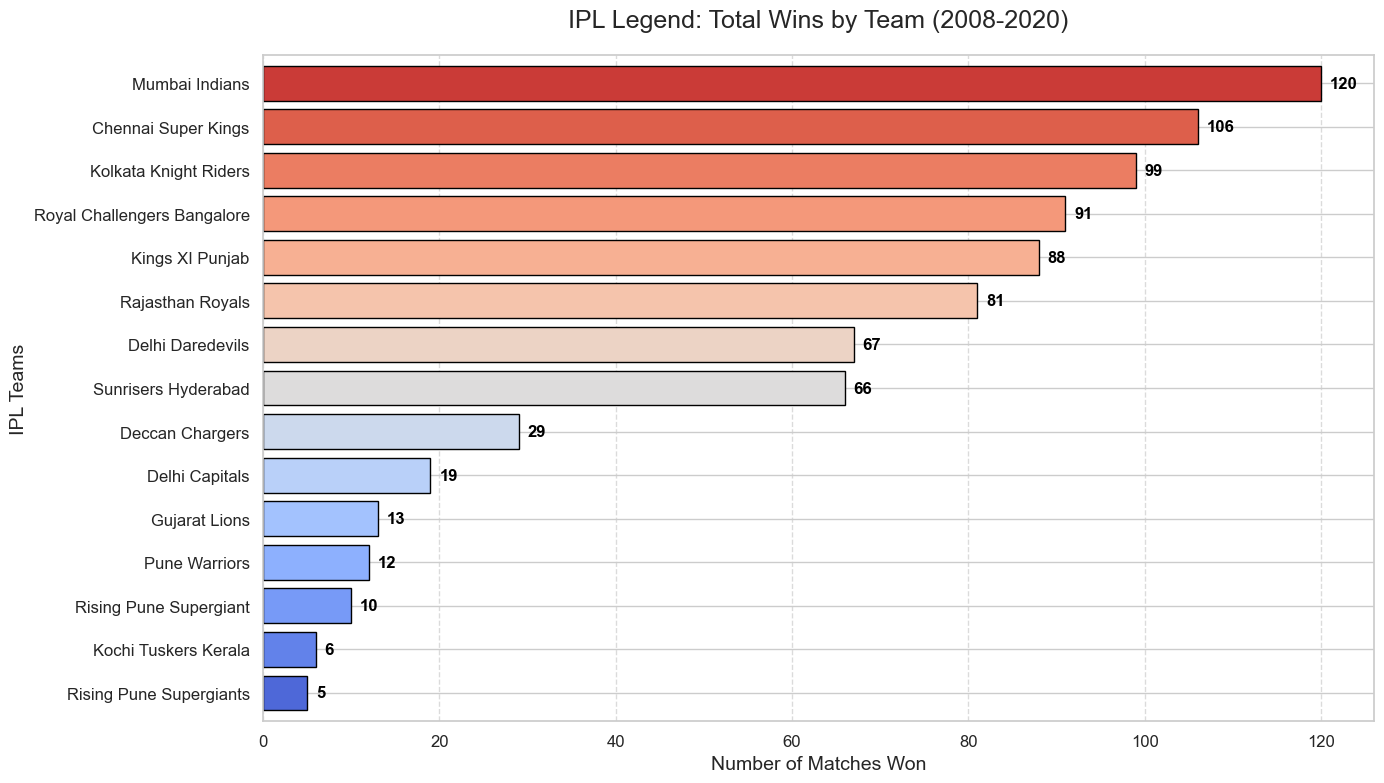

In [40]:
plt.figure(figsize=(14, 8))
team_wins = match_data['winner'].value_counts().sort_values(ascending=True)
colors = sns.color_palette('coolwarm', len(team_wins))
team_wins.plot(kind='barh', color=colors, edgecolor='black', width=0.8)
for i, v in enumerate(team_wins):
    plt.text(v + 1, i, str(v), color='black', fontweight='bold', va='center')
plt.title('IPL Legend: Total Wins by Team (2008-2020)', pad=20)
plt.xlabel('Number of Matches Won')
plt.ylabel('IPL Teams')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 2. The Toss Impact Analysis
Explaining the correlation between luck (toss) and destiny (win).


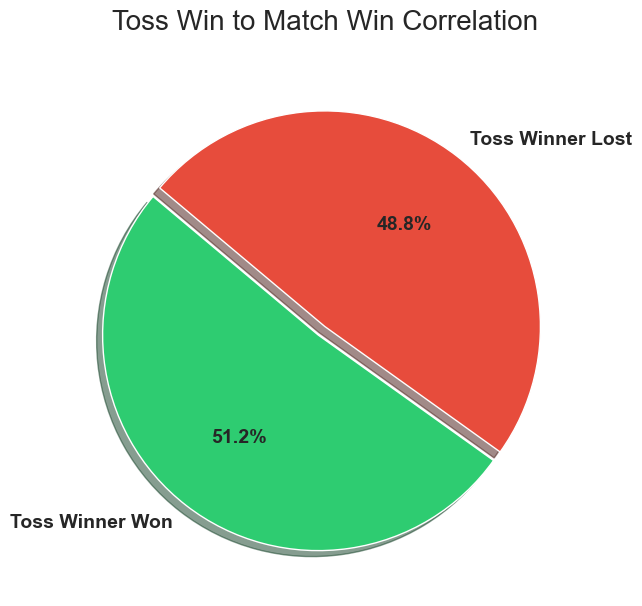

In [41]:
toss_match_win = (match_data['toss_winner'] == match_data['winner']).value_counts()
plt.figure(figsize=(10, 7))
plt.pie(toss_match_win, labels=['Toss Winner Won', 'Toss Winner Lost'], 
        autopct='%1.1f%%', startangle=140, colors=['#2ecc71', '#e74c3c'], 
        explode=(0.05, 0), shadow=True, textprops={'fontsize': 14, 'fontweight': 'bold'})
plt.title('Toss Win to Match Win Correlation', size=20, pad=20)
plt.show()


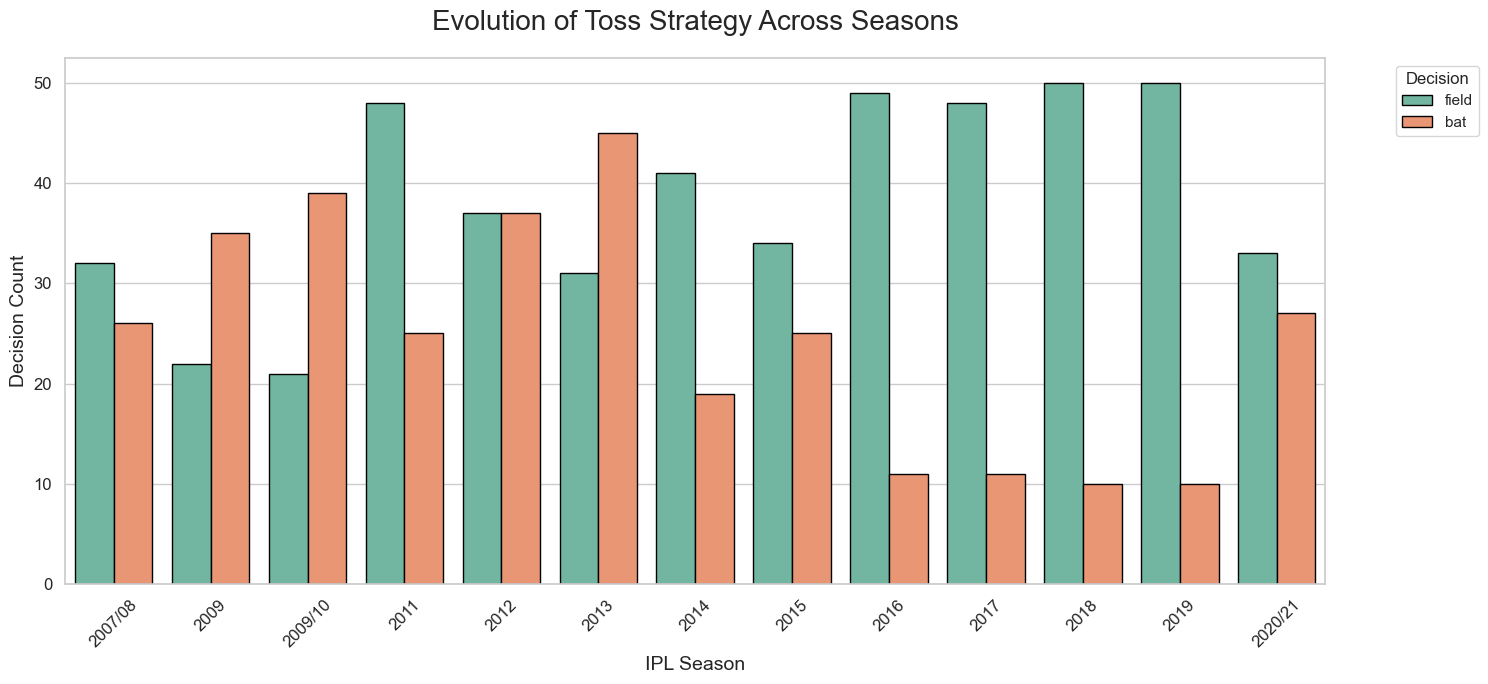

In [42]:
plt.figure(figsize=(15, 7))
sns.countplot(x='season', hue='toss_decision', data=match_data, palette='Set2', edgecolor='black')
plt.title('Evolution of Toss Strategy Across Seasons', size=20, pad=20)
plt.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.xlabel('IPL Season')
plt.ylabel('Decision Count')
plt.tight_layout()
plt.show()


### 3. Iconic Venues
Where the magic happens. Statistical footprint of stadiums.


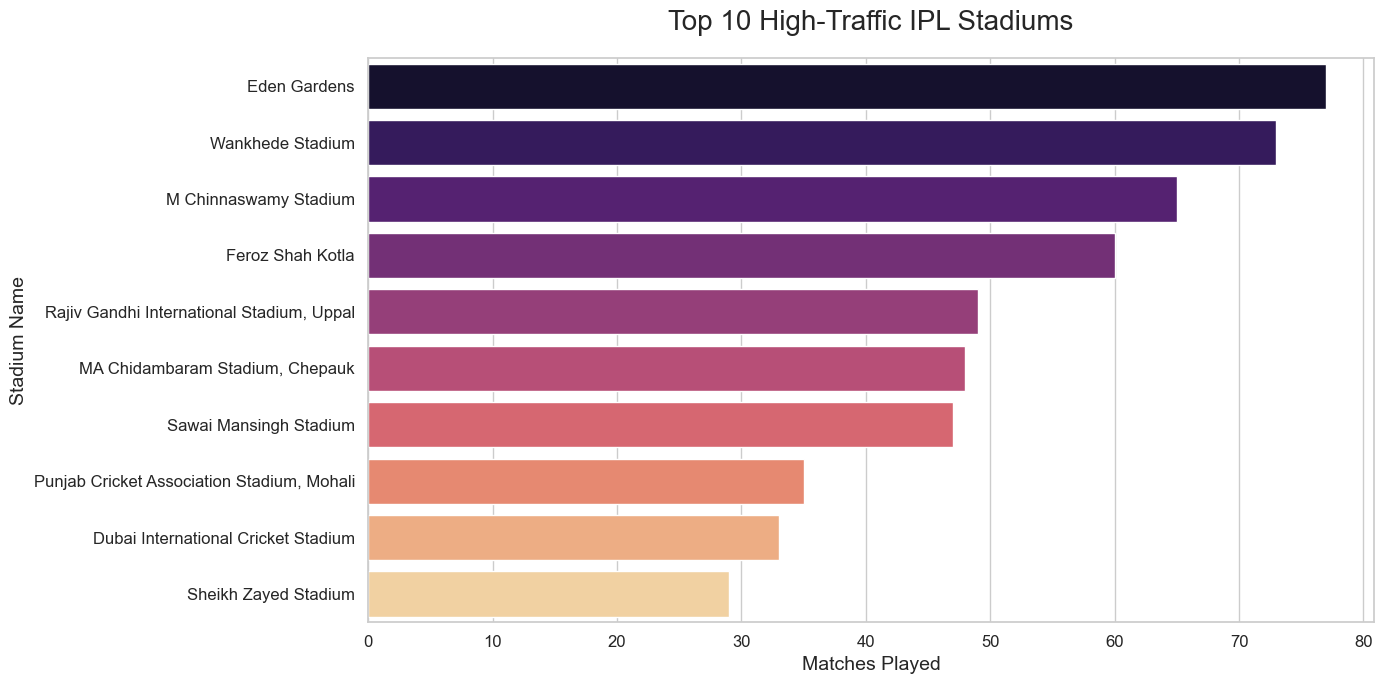

In [43]:
plt.figure(figsize=(14, 7))
venue_counts = match_data['venue'].value_counts().head(10)
sns.barplot(x=venue_counts.values, y=venue_counts.index, hue=venue_counts.index, palette='magma', legend=False)
plt.title('Top 10 High-Traffic IPL Stadiums', size=20, pad=20)
plt.xlabel('Matches Played')
plt.ylabel('Stadium Name')
plt.tight_layout()
plt.show()


### 4. Legendary Players: Run Scorers & Wicket Takers


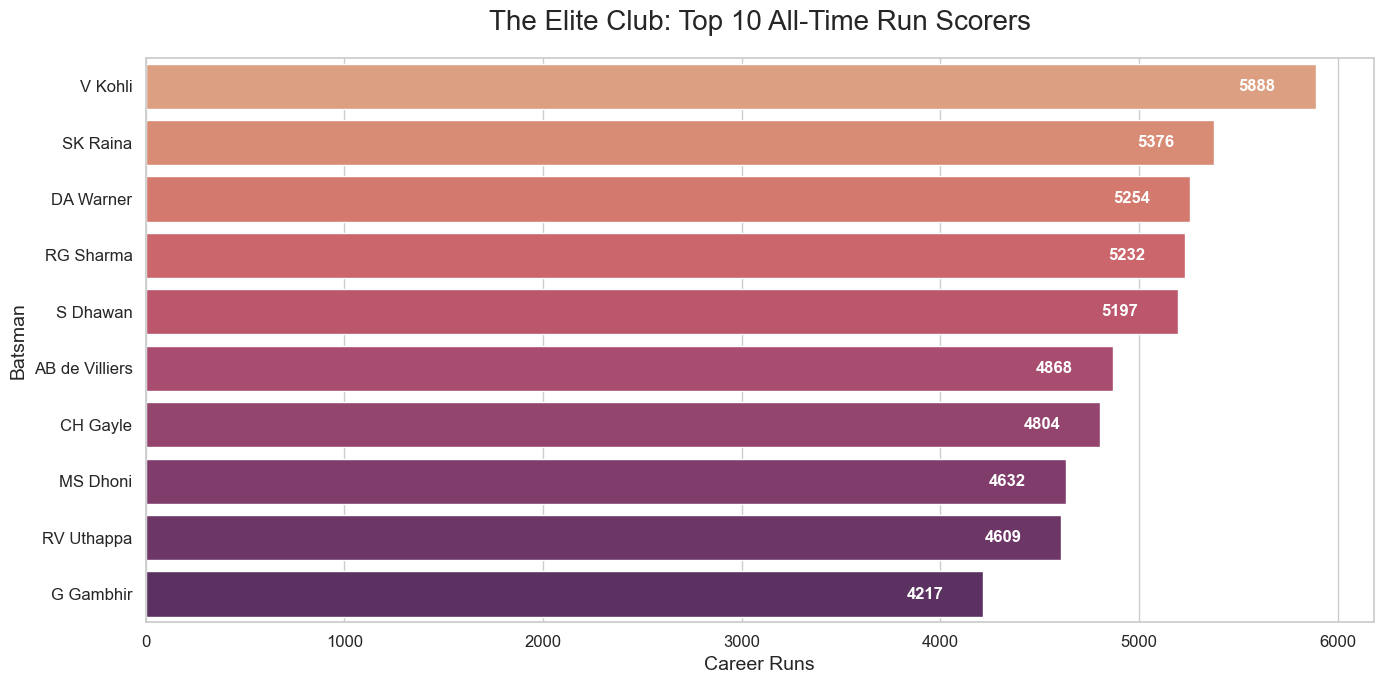

In [44]:
top_batsmen = ball_data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_batsmen.values, y=top_batsmen.index, hue=top_batsmen.index, palette='flare', legend=False)
plt.title('The Elite Club: Top 10 All-Time Run Scorers', size=20, pad=20)
plt.xlabel('Career Runs')
plt.ylabel('Batsman')
for i, v in enumerate(top_batsmen):
    ax.text(v - 200, i, f'{int(v)}', color='white', fontweight='bold', ha='right', va='center')
plt.tight_layout()
plt.show()


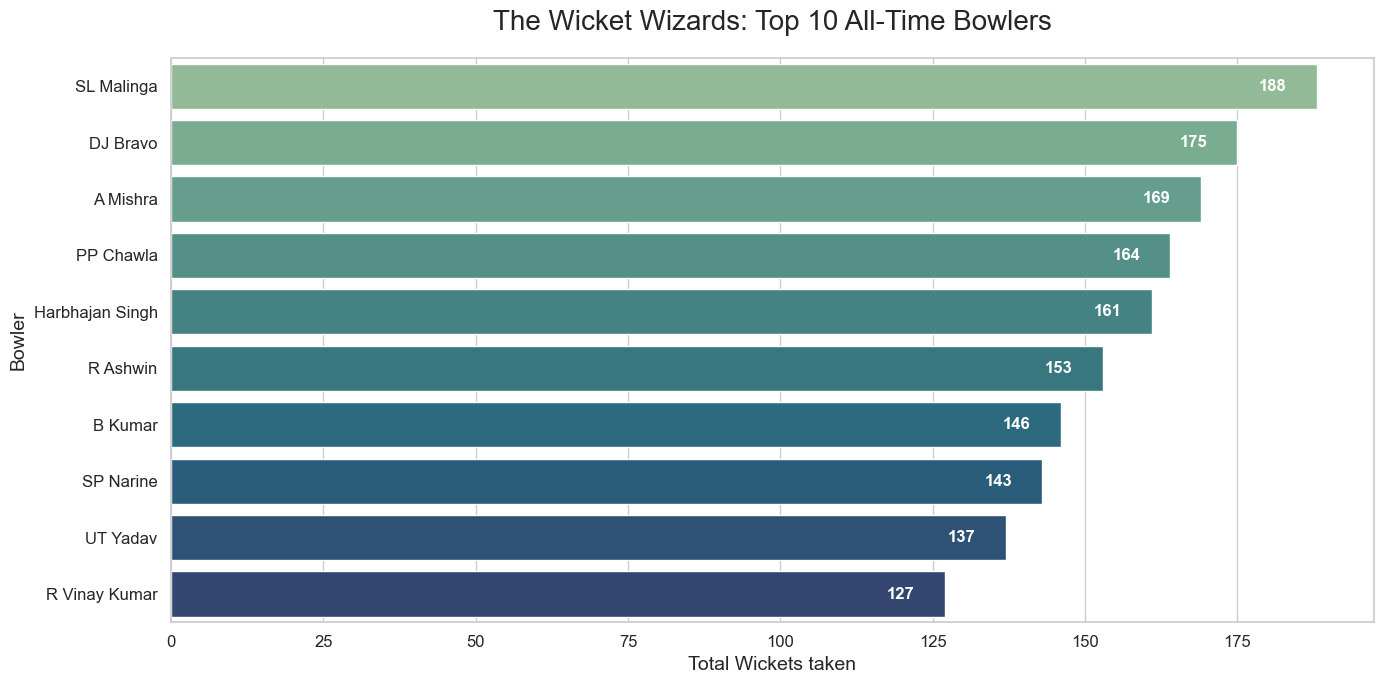

In [45]:
top_bowlers = ball_data[ball_data['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_bowlers.values, y=top_bowlers.index, hue=top_bowlers.index, palette='crest', legend=False)
plt.title('The Wicket Wizards: Top 10 All-Time Bowlers', size=20, pad=20)
plt.xlabel('Total Wickets taken')
plt.ylabel('Bowler')
for i, v in enumerate(top_bowlers):
    ax.text(v - 5, i, f'{int(v)}', color='white', fontweight='bold', ha='right', va='center')
plt.tight_layout()
plt.show()


### 5. Tactical Breakdown
Analyzing how wickets fall and extras are conceded.


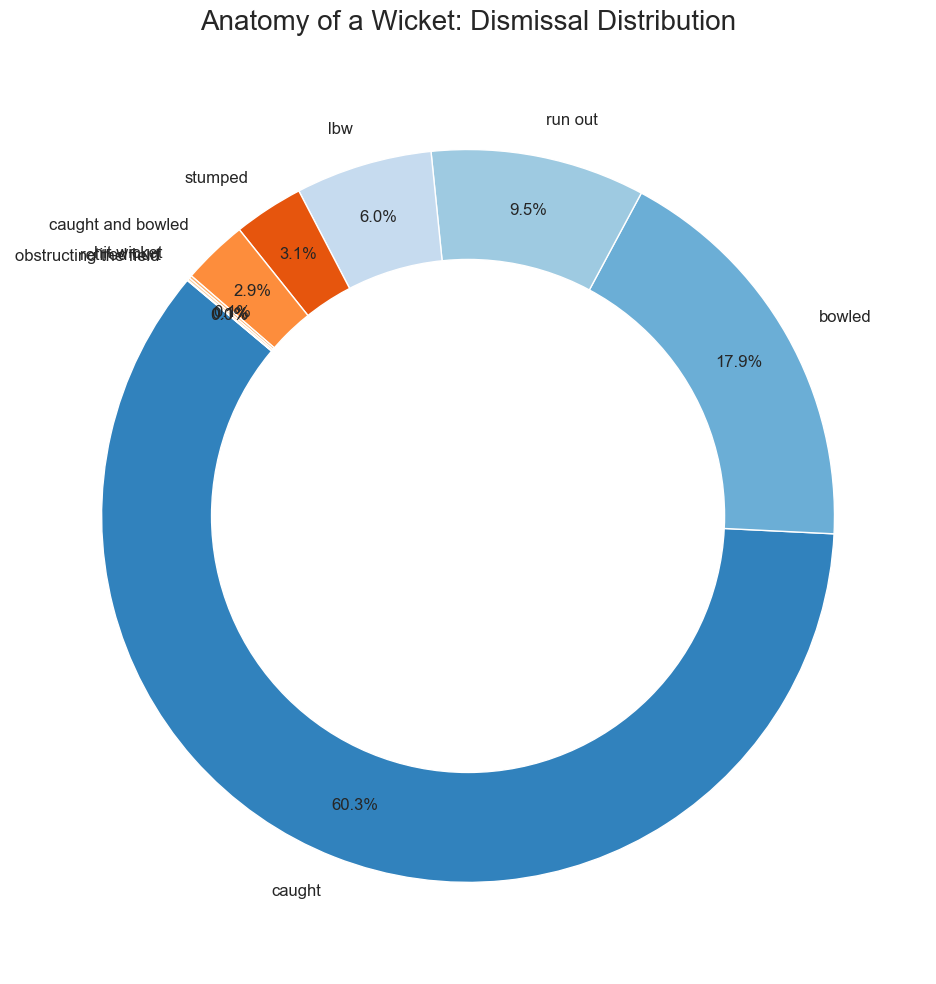

In [46]:
dismissal_types = ball_data['dismissal_kind'].value_counts()
plt.figure(figsize=(12, 10))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette('tab20c'), pctdistance=0.85, shadow=False)
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Anatomy of a Wicket: Dismissal Distribution', size=20, pad=20)
plt.tight_layout()
plt.show()
